<a href="https://colab.research.google.com/github/AN70NI1LDO/Regressao/blob/main/execReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2. Importando bibliotecas

In [59]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

2.1 Lendo arquivo

In [60]:
adms = pd.read_csv ("/content/drive/MyDrive/datasetExerc/Data/Admission_Predict_Ver1.1.csv")
adms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [61]:
adms.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

2.2 Separando features e targets

In [62]:
X = adms [adms.columns [:-1]]
X

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1
496,497,337,117,5,5.0,5.0,9.87,1
497,498,330,120,5,4.5,5.0,9.56,1
498,499,312,103,4,4.0,5.0,8.43,0


In [63]:
y = adms [adms.columns [-1:]]
y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
495,0.87
496,0.96
497,0.93
498,0.73


2.3 Imprimindo características do Dataframe

0


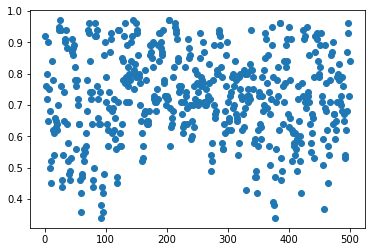

1


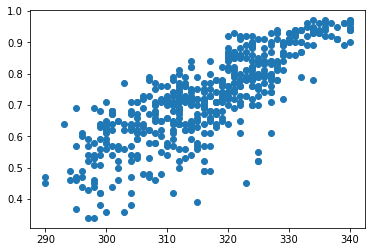

2


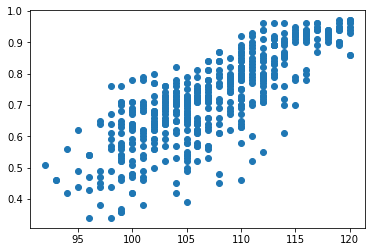

3


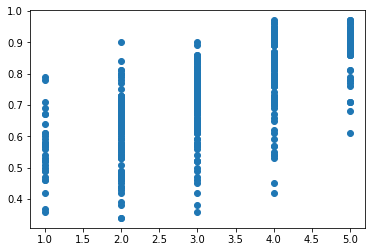

4


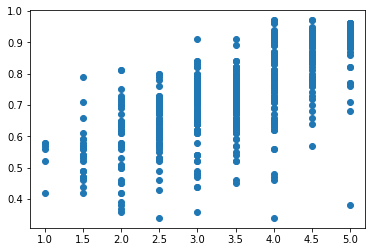

5


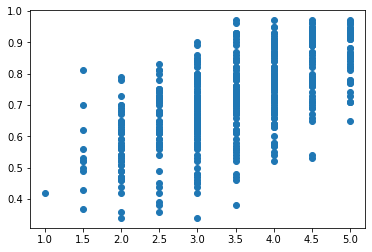

6


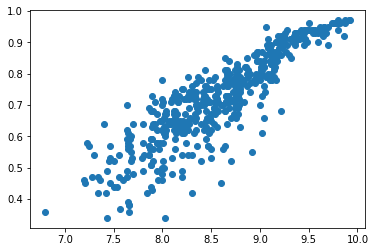

7


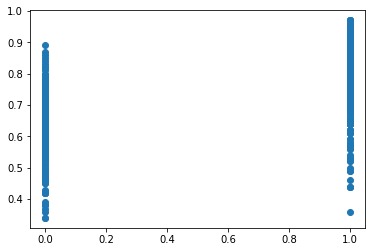

In [64]:
import matplotlib.pyplot as plt
for i in range (X.shape [1]):
  print (i)
  plt.scatter (X.iloc[:, i], y)
  plt.show()

2.4 Selecionando melhor distribuição de características

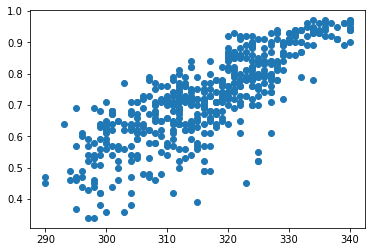

In [65]:
X2 = X.iloc [:, 1:2]
plt.scatter (X2, y)
plt.show()

2.5 Manipulando dados

In [66]:
from sklearn.linear_model import LinearRegression
adms_lr = LinearRegression()

In [67]:
adms_lr.fit(X2, y)

LinearRegression()

In [68]:
lst_W = []
dlt = 1 # Variacao do Delta
inter = adms_lr.intercept_ # Variavel W
lst_W = np.linspace (inter + dlt, inter - dlt, 30)

lst_mse = []
for v in range (30):
  adms_lr.intercept_ = lst_W [v]
  ypred = adms_lr.predict (X2)
  mse = mean_squared_error (y, ypred)
  lst_mse.append (mse)

print (lst_mse)

[1.0068257023198925, 0.873650910405505, 0.7499886036278591, 0.6358387819869556, 0.5312014454827936, 0.436076594115374, 0.35046422788469633, 0.2743643467907603, 0.20777695083356681, 0.15070204001311485, 0.10313961432940488, 0.06508967378243713, 0.036552218372211114, 0.017527248098727122, 0.008014762961985163, 0.008014762961985158, 0.0175272480987271, 0.03655221837221094, 0.06508967378243709, 0.10313961432940484, 0.15070204001311477, 0.20777695083356676, 0.27436434679076027, 0.3504642278846962, 0.4360765941153742, 0.5312014454827935, 0.6358387819869554, 0.7499886036278594, 0.8736509104055045, 1.0068257023198923]


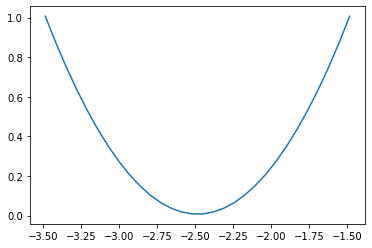

In [69]:
plt.plot (lst_W, lst_mse)
plt.show()